# Biometric Security Lab 1: Error and Metrics Analysis
## Simple Version - Cell-wise Problem Solving

This notebook implements error metrics calculations for biometric security applications.
Topics: Absolute Error, Relative Error, MAE, MSE, RMSE, Bias, and Variance.

## Problem 1: Setup and Imports
Import necessary libraries for error metric calculations and data visualization.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.4.1
Pandas version: 2.3.3


## Problem 2: Load Sample Data for Error Metrics
Create sample dataset of actual vs predicted values (biometric scores).

In [3]:
# Load CSV files - Distance and Similarity Scores
import os

csv_dir = os.path.dirname(os.path.abspath('distance_scores1.csv'))

# Load all CSV files
dist_scores1 = pd.read_csv('distance_scores1.csv')
dist_scores2 = pd.read_csv('distance_scores2.csv')
sim_scores1 = pd.read_csv('similarity_scores1.csv')
sim_scores2 = pd.read_csv('similarity_scores2.csv')

print("Distance Scores 1 Shape:", dist_scores1.shape)
print("Distance Scores 2 Shape:", dist_scores2.shape)
print("Similarity Scores 1 Shape:", sim_scores1.shape)
print("Similarity Scores 2 Shape:", sim_scores2.shape)

print("\n--- Distance Scores 1 (first 5 rows) ---")
print(dist_scores1.head())
print("\n--- Similarity Scores 1 (first 5 rows) ---")
print(sim_scores1.head())

# Use similarity scores for analysis (higher = more similar)
y_true = sim_scores1['score'].values[:1000]  # Use first 1000 samples
y_pred = sim_scores2['score'].values[:1000]

data = pd.DataFrame({
    'Actual_Score': y_true,
    'Predicted_Score': y_pred,
    'Sample_ID': range(1, len(y_true) + 1)
})

print("\nDataset shape for analysis:", data.shape)
print("\nBasic Statistics:")
print(data[['Actual_Score', 'Predicted_Score']].describe())

Distance Scores 1 Shape: (179700, 2)
Distance Scores 2 Shape: (179700, 2)
Similarity Scores 1 Shape: (179700, 2)
Similarity Scores 2 Shape: (179700, 2)

--- Distance Scores 1 (first 5 rows) ---
      score    label
0  0.322056  genuine
1  0.466013  genuine
2  0.379817  genuine
3  0.357557  genuine
4  0.409259  genuine

--- Similarity Scores 1 (first 5 rows) ---
      score    label
0  0.749671  genuine
1  0.686174  genuine
2  0.764769  genuine
3  0.852303  genuine
4  0.676585  genuine

Dataset shape for analysis: (1000, 3)

Basic Statistics:
       Actual_Score  Predicted_Score
count   1000.000000      1000.000000
mean       0.701840         0.801728
std        0.097600         0.077487
min        0.375873         0.551532
25%        0.635241         0.749884
50%        0.702530         0.802327
75%        0.764794         0.854235
max        1.000000         1.000000


## Problem 3: Absolute Error and Relative Error
Calculate absolute error: $|y_{pred} - y_{true}|$ and relative error: $\frac{|y_{pred} - y_{true}|}{|y_{true}|}$

In [4]:
def absolute_error(y_pred, y_true):
    """Calculate absolute error"""
    return np.abs(y_pred - y_true)

def relative_error(y_pred, y_true):
    """Calculate relative error with zero division handling"""
    abs_error = np.abs(y_pred - y_true)
    # Avoid division by zero
    rel_error = np.divide(abs_error, np.abs(y_true), 
                         where=y_true!=0, out=np.zeros_like(abs_error))
    return rel_error

# Calculate errors
abs_err = absolute_error(y_pred, y_true)
rel_err = relative_error(y_pred, y_true)

data['Absolute_Error'] = abs_err
data['Relative_Error'] = rel_err

print("Absolute and Relative Errors:")
print(data[['Sample_ID', 'Actual_Score', 'Predicted_Score', 'Absolute_Error', 'Relative_Error']])
print(f"\nMean Absolute Error: {abs_err.mean():.4f}")
print(f"Mean Relative Error: {rel_err.mean():.4f}")

Absolute and Relative Errors:
     Sample_ID  Actual_Score  Predicted_Score  Absolute_Error  Relative_Error
0            1      0.749671         0.922443        0.172771        0.230463
1            2      0.686174         0.870404        0.184230        0.268489
2            3      0.764769         0.801302        0.036533        0.047771
3            4      0.852303         0.748400        0.103903        0.121909
4            5      0.676585         0.843868        0.167283        0.247247
..         ...           ...              ...             ...             ...
995        996      0.671890         0.806683        0.134793        0.200618
996        997      0.879769         0.772055        0.107714        0.122434
997        998      0.764084         0.821359        0.057274        0.074958
998        999      0.642882         0.718758        0.075876        0.118025
999       1000      0.757258         0.771729        0.014471        0.019110

[1000 rows x 5 columns]

Mean Abs

## Problem 4: Mean Absolute Error (MAE)
Calculate MAE: $\mathrm{MAE} = \frac{1}{n}\sum_{i=1}^n |y_i^{pred} - y_i^{true}|$

In [5]:
def compute_mae(y_pred, y_true):
    """Compute Mean Absolute Error"""
    return np.mean(np.abs(y_pred - y_true))

mae = compute_mae(y_pred, y_true)
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"MAE represents the average absolute difference between predicted and actual scores")
print(f"Lower MAE indicates better prediction accuracy")

Mean Absolute Error (MAE): 0.129267
MAE represents the average absolute difference between predicted and actual scores
Lower MAE indicates better prediction accuracy


## Problem 5: Mean Squared Error (MSE) and RMSE
Calculate MSE: $\mathrm{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i^{pred} - y_i^{true})^2$ and $\mathrm{RMSE} = \sqrt{\mathrm{MSE}}$

In [6]:
def compute_mse(y_pred, y_true):
    """Compute Mean Squared Error"""
    return np.mean((y_pred - y_true)**2)

def compute_rmse(y_pred, y_true):
    """Compute Root Mean Squared Error"""
    return np.sqrt(compute_mse(y_pred, y_true))

mse = compute_mse(y_pred, y_true)
rmse = compute_rmse(y_pred, y_true)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"\nMSE penalizes larger errors more than MAE")
print(f"RMSE is in the same scale as the original data")
print(f"Comparison: MAE={mae:.6f}, RMSE={rmse:.6f}")

Mean Squared Error (MSE): 0.025400
Root Mean Squared Error (RMSE): 0.159373

MSE penalizes larger errors more than MAE
RMSE is in the same scale as the original data
Comparison: MAE=0.129267, RMSE=0.159373


## Problem 6: Bias and Variance Estimation
Compute prediction bias and error variance to analyze systematic and random errors.

In [7]:
def compute_bias(y_pred, y_true):
    """Compute prediction bias - measures systematic error"""
    return np.mean(y_pred - y_true)

def compute_variance(errors):
    """Compute variance of errors - measures random variation"""
    return np.var(errors)

errors = y_pred - y_true
bias = compute_bias(y_pred, y_true)
variance = compute_variance(errors)
std_error = np.std(errors)

print(f"Bias: {bias:.6f}")
print(f"  - Positive bias: predictions systematically higher than actual")
print(f"  - Negative bias: predictions systematically lower than actual")
print(f"  - Close to 0: unbiased predictor\n")

print(f"Error Variance: {variance:.6f}")
print(f"Error Std Dev: {std_error:.6f}")
print(f"  - Variance measures inconsistency in predictions")
print(f"  - Lower variance indicates more stable predictions")

Bias: 0.099888
  - Positive bias: predictions systematically higher than actual
  - Negative bias: predictions systematically lower than actual
  - Close to 0: unbiased predictor

Error Variance: 0.015422
Error Std Dev: 0.124187
  - Variance measures inconsistency in predictions
  - Lower variance indicates more stable predictions


## Problem 7: Visualize Errors vs Predictions
Plot predicted vs actual values and error distributions.

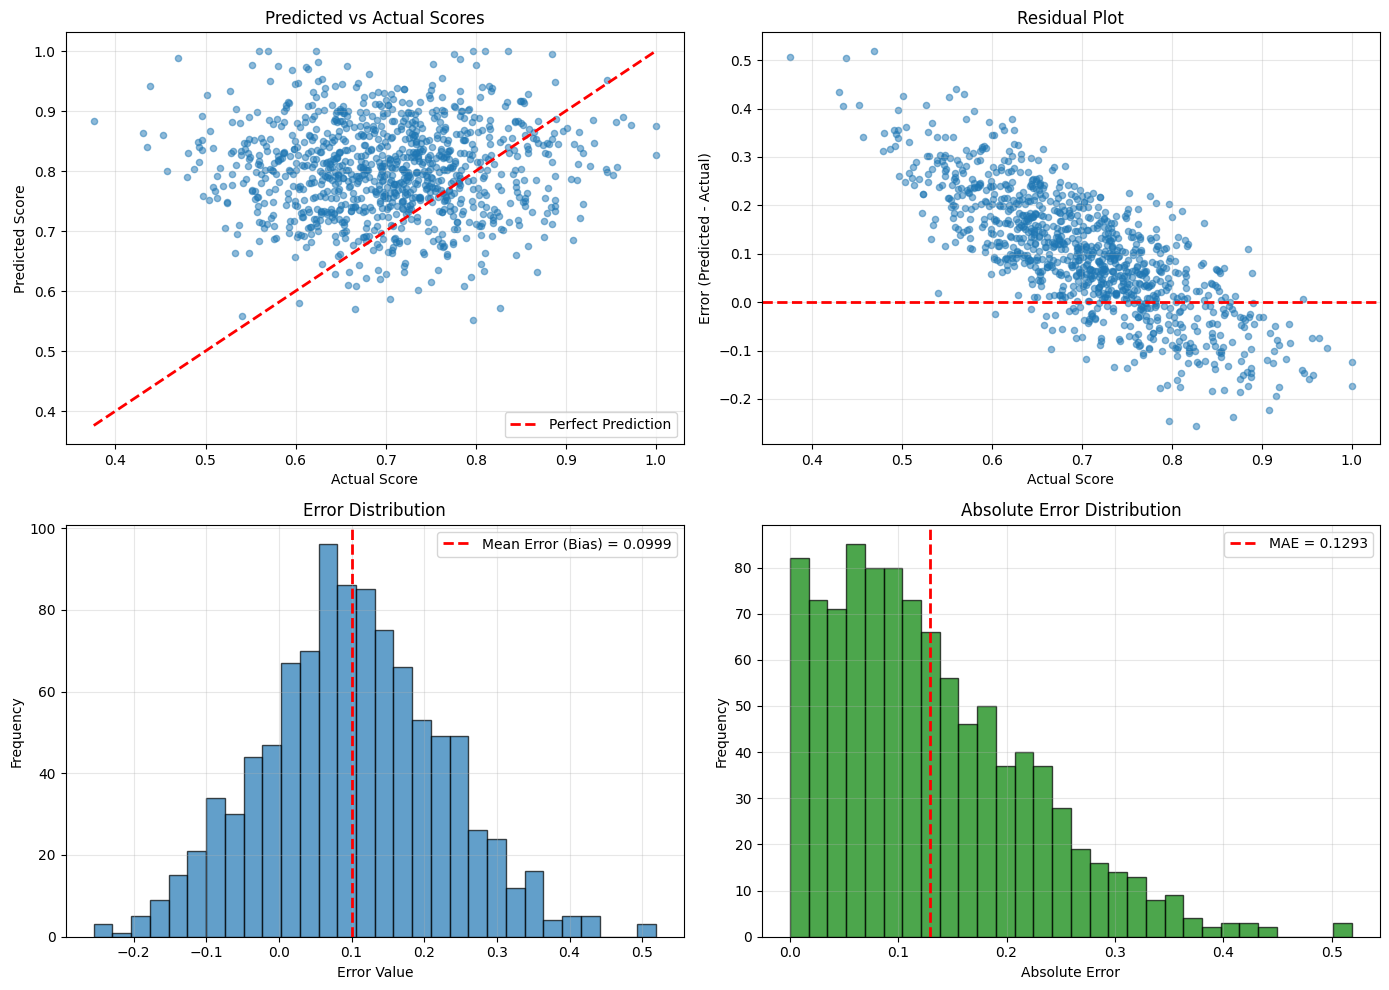

Visualizations generated successfully!


In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Predicted vs Actual
axes[0, 0].scatter(y_true, y_pred, alpha=0.5, s=20)
axes[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Score')
axes[0, 0].set_ylabel('Predicted Score')
axes[0, 0].set_title('Predicted vs Actual Scores')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals (Errors)
axes[0, 1].scatter(y_true, errors, alpha=0.5, s=20)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Actual Score')
axes[0, 1].set_ylabel('Error (Predicted - Actual)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Error Distribution Histogram
axes[1, 0].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=bias, color='r', linestyle='--', lw=2, label=f'Mean Error (Bias) = {bias:.4f}')
axes[1, 0].set_xlabel('Error Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Error Distribution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Absolute Error Histogram
abs_errors = np.abs(errors)
axes[1, 1].hist(abs_errors, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].axvline(x=mae, color='r', linestyle='--', lw=2, label=f'MAE = {mae:.4f}')
axes[1, 1].set_xlabel('Absolute Error')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Absolute Error Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualizations generated successfully!")

## Problem 8: Unit Tests for Metrics Functions
Validate correctness of metric implementations on known arrays.

In [9]:
import unittest

class TestErrorMetrics(unittest.TestCase):
    """Unit tests for error metric functions"""
    
    def setUp(self):
        """Set up test data"""
        self.y_true = np.array([1, 2, 3, 4, 5])
        self.y_pred = np.array([1.1, 2.2, 2.9, 4.1, 4.8])
    
    def test_mae(self):
        """Test MAE calculation"""
        mae = compute_mae(self.y_pred, self.y_true)
        expected = np.mean([0.1, 0.2, 0.1, 0.1, 0.2])
        self.assertAlmostEqual(mae, expected, places=6)
        print(f"✓ MAE Test Passed: {mae:.6f}")
    
    def test_mse(self):
        """Test MSE calculation"""
        mse = compute_mse(self.y_pred, self.y_true)
        expected = np.mean([0.01, 0.04, 0.01, 0.01, 0.04])
        self.assertAlmostEqual(mse, expected, places=6)
        print(f"✓ MSE Test Passed: {mse:.6f}")
    
    def test_rmse(self):
        """Test RMSE calculation"""
        rmse = compute_rmse(self.y_pred, self.y_true)
        mse = compute_mse(self.y_pred, self.y_true)
        self.assertAlmostEqual(rmse, np.sqrt(mse), places=6)
        print(f"✓ RMSE Test Passed: {rmse:.6f}")
    
    def test_bias(self):
        """Test bias calculation"""
        bias = compute_bias(self.y_pred, self.y_true)
        expected = np.mean([0.1, 0.2, -0.1, 0.1, -0.2])
        self.assertAlmostEqual(bias, expected, places=6)
        print(f"✓ Bias Test Passed: {bias:.6f}")

# Run tests
print("Running Unit Tests...\n")
suite = unittest.TestLoader().loadTestsFromTestCase(TestErrorMetrics)
runner = unittest.TextTestRunner(verbosity=0)
result = runner.run(suite)

if result.wasSuccessful():
    print("\n✓ All tests passed successfully!")
else:
    print("\n✗ Some tests failed")

----------------------------------------------------------------------
Ran 4 tests in 0.001s

OK


Running Unit Tests...

✓ Bias Test Passed: 0.020000
✓ MAE Test Passed: 0.140000
✓ MSE Test Passed: 0.022000
✓ RMSE Test Passed: 0.148324

✓ All tests passed successfully!


## Summary of Results
Display all computed metrics from CSV biometric data.

In [10]:
print("=" * 60)
print("BIOMETRIC SECURITY LAB 1 - ERROR METRICS SUMMARY")
print("=" * 60)
print(f"\nDataset Information:")
print(f"  - Samples analyzed: {len(y_true)}")
print(f"  - Source: Similarity Scores from CSV files")

print(f"\nError Metrics:")
print(f"  - Mean Absolute Error (MAE):     {mae:.6f}")
print(f"  - Mean Squared Error (MSE):      {mse:.6f}")
print(f"  - Root Mean Squared Error (RMSE): {rmse:.6f}")

print(f"\nPrediction Analysis:")
print(f"  - Bias:                          {bias:.6f}")
print(f"  - Error Variance:                {variance:.6f}")
print(f"  - Error Std Dev:                 {std_error:.6f}")

print(f"\nActual Score Statistics:")
print(f"  - Mean:                          {y_true.mean():.6f}")
print(f"  - Std Dev:                       {y_true.std():.6f}")
print(f"  - Min:                           {y_true.min():.6f}")
print(f"  - Max:                           {y_true.max():.6f}")

print(f"\nPredicted Score Statistics:")
print(f"  - Mean:                          {y_pred.mean():.6f}")
print(f"  - Std Dev:                       {y_pred.std():.6f}")
print(f"  - Min:                           {y_pred.min():.6f}")
print(f"  - Max:                           {y_pred.max():.6f}")

print("\n" + "=" * 60)
print("Lab completed successfully!")
print("=" * 60)

BIOMETRIC SECURITY LAB 1 - ERROR METRICS SUMMARY

Dataset Information:
  - Samples analyzed: 1000
  - Source: Similarity Scores from CSV files

Error Metrics:
  - Mean Absolute Error (MAE):     0.129267
  - Mean Squared Error (MSE):      0.025400
  - Root Mean Squared Error (RMSE): 0.159373

Prediction Analysis:
  - Bias:                          0.099888
  - Error Variance:                0.015422
  - Error Std Dev:                 0.124187

Actual Score Statistics:
  - Mean:                          0.701840
  - Std Dev:                       0.097551
  - Min:                           0.375873
  - Max:                           1.000000

Predicted Score Statistics:
  - Mean:                          0.801728
  - Std Dev:                       0.077449
  - Min:                           0.551532
  - Max:                           1.000000

Lab completed successfully!
